In [200]:
from rdkit import Chem

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
from rdkit.Chem import Descriptors

In [203]:
df = pd.read_excel('ci700100f_si_Dmitry_etal_JCIM.xls', sheet_name = 'KC291_V1')

In [310]:
df.tail()

,KC291-dataset- SMILES,No,Name,logBB,ALOGP,TPSA(Tot),SsssN,AbsCarboxy,Iv
286,CCC(NC(C2=C(C(C4=CC=CC=C4)=NC3=C2C=CC=C3)C)=O)...,324,SB222200,0.30,6.142,41.99,0.00000,0,0
287,NC(N3C1=CC=CC=C1C2CC2C4=CC=CC=C34)=O,325,CBZ-EPO,-0.34,2.800,46.33,1.64963,0,0
288,O=C3C1=C(N2C=NC(C4=NOC(C(C)C)=N4)=C2CN3C)C=CC=...,326,"L-663,581",-0.30,2.832,77.05,1.60929,0,0
289,O=C3C1=C(N2C=NC(C4=NOC(C(C)(O)C)=N4)=C2CN3C)C=...,327,"M1L-663,581",-1.34,1.826,97.28,1.56121,0,0
290,O=C3C1=C(N2C=NC(C4=NOC(C(C)(O)CO)=N4)=C2CN3C)C...,328,"M2L-663,581",-1.82,0.938,117.51,1.52738,0,0


In [205]:
df['KC291-dataset- SMILES']

0                                                [N][N] 
1                                           [N-]=[N+]=O 
2                                      [H]C([H])([H])[H]
3                                                 CCCCC 
4                                                CCCCCC 
                             ...                        
286    CCC(NC(C2=C(C(C4=CC=CC=C4)=NC3=C2C=CC=C3)C)=O)...
287                 NC(N3C1=CC=CC=C1C2CC2C4=CC=CC=C34)=O
288    O=C3C1=C(N2C=NC(C4=NOC(C(C)C)=N4)=C2CN3C)C=CC=...
289    O=C3C1=C(N2C=NC(C4=NOC(C(C)(O)C)=N4)=C2CN3C)C=...
290    O=C3C1=C(N2C=NC(C4=NOC(C(C)(O)CO)=N4)=C2CN3C)C...
Name: KC291-dataset- SMILES, Length: 291, dtype: object

In [206]:
smile_list = [Chem.MolFromSmiles(mol) for mol in df['KC291-dataset- SMILES']]

In [207]:
type(smile_list)

list

In [208]:
def generate(smiles, verbos =False):
    moldata=[]
    for elem in df['KC291-dataset- SMILES']:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData = np.arange(1,1)
    i =0
    for mol in moldata:
        
        mol_log_p = Descriptors.MolLogP(mol)
        mol_wt = Descriptors.MolWt(mol)
        mol_RB = Descriptors.NumRotatableBonds(mol)
    
        row = np.array([mol_log_p,mol_wt, mol_RB ])
    
        if i ==0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i+1
    
    ColumnNames = ['mol_log_p','mol_wt', 'mol_RB']
    descriptors = pd.DataFrame(data = baseData , columns = ColumnNames )
    
    return descriptors
    
    

In [209]:
df1 = generate(df['KC291-dataset- SMILES'])

In [210]:
df1

,mol_log_p,mol_wt,mol_RB
0,-0.96120,28.014,0.0
1,-0.15840,44.013,0.0
2,0.63610,16.043,0.0
3,2.19650,72.151,2.0
4,2.58660,86.178,3.0
...,...,...,...
286,6.09132,380.491,5.0
287,3.48790,250.301,0.0
288,3.28470,357.801,2.0
289,2.38870,373.800,2.0


In [211]:
def AromaticAtoms(m):
    aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range (m.GetNumAtoms())]
    aa_count =[]
    for i in aromatic_atoms:
        if i==True:
            aa_count.append(1)
    sum_aa_count = sum(aa_count)
    return sum_aa_count

In [212]:
AromaticAtoms = [AromaticAtoms(element) for element in smile_list]


In [213]:
type(AromaticAtoms)

list

In [214]:
heavy_atoms = [Descriptors.HeavyAtomCount(element) for element in smile_list]

In [215]:
type(heavy_atoms)

list

In [217]:
aromatic_proportion = [i / j for i, j in zip(AromaticAtoms,heavy_atoms )] 

In [218]:
aromatic_proportion

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.8571428571428571,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.6,
 0.6666666666666666,
 0.5454545454545454,
 0.0,
 0.0,
 0.4166666666666667,
 0.29411764705882354,
 0.2857142857142857,
 0.3157894736842105,
 0.7083333333333334,
 0.35294117647058826,
 0.7333333333333333,
 0.7083333333333334,
 0.2857142857142857,
 0.7333333333333333,
 0.35294117647058826,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4838709677419355,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.35294117647058826,
 0.42857142857142855,
 0.772727

In [219]:
df_aromatic_proportion = pd.DataFrame(aromatic_proportion, columns=['aromatic_proportion'])

In [220]:
desc = pd.concat([df, df1,df_aromatic_proportion], axis =1)

In [221]:
desc

,KC291-dataset- SMILES,No,Name,logBB,ALOGP,TPSA(Tot),SsssN,AbsCarboxy,Iv,mol_log_p,mol_wt,mol_RB,aromatic_proportion
0,[N][N],6,Nitrogen,0.030000,-1.191,52.04,0.00000,0,1,-0.96120,28.014,0.0,0.000000
1,[N-]=[N+]=O,7,Nitrous Oxide,0.030000,-1.467,53.47,0.00000,0,1,-0.15840,44.013,0.0,0.000000
2,[H]C([H])([H])[H],8,Methane,0.030000,1.376,0.00,0.00000,0,1,0.63610,16.043,0.0,0.000000
3,CCCCC,9,Pentane,0.632423,2.653,0.00,0.00000,0,1,2.19650,72.151,2.0,0.000000
4,CCCCCC,10,Hexane,0.680000,3.109,0.00,0.00000,0,1,2.58660,86.178,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,CCC(NC(C2=C(C(C4=CC=CC=C4)=NC3=C2C=CC=C3)C)=O)...,324,SB222200,0.300000,6.142,41.99,0.00000,0,0,6.09132,380.491,5.0,0.758621
287,NC(N3C1=CC=CC=C1C2CC2C4=CC=CC=C34)=O,325,CBZ-EPO,-0.340000,2.800,46.33,1.64963,0,0,3.48790,250.301,0.0,0.631579
288,O=C3C1=C(N2C=NC(C4=NOC(C(C)C)=N4)=C2CN3C)C=CC=...,326,"L-663,581",-0.300000,2.832,77.05,1.60929,0,0,3.28470,357.801,2.0,0.640000
289,O=C3C1=C(N2C=NC(C4=NOC(C(C)(O)C)=N4)=C2CN3C)C=...,327,"M1L-663,581",-1.340000,1.826,97.28,1.56121,0,0,2.38870,373.800,2.0,0.615385


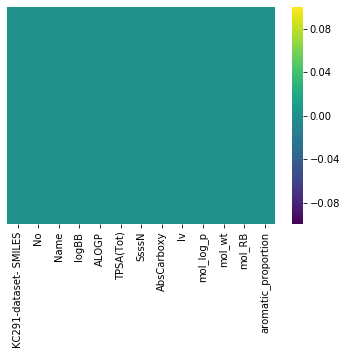

In [222]:
sns.heatmap(desc.isnull(), yticklabels=False, cmap = 'viridis')  ## no data is missing

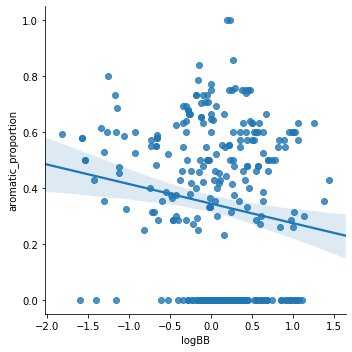

In [223]:
sns.lmplot(data =desc, x= 'logBB', y='aromatic_proportion')

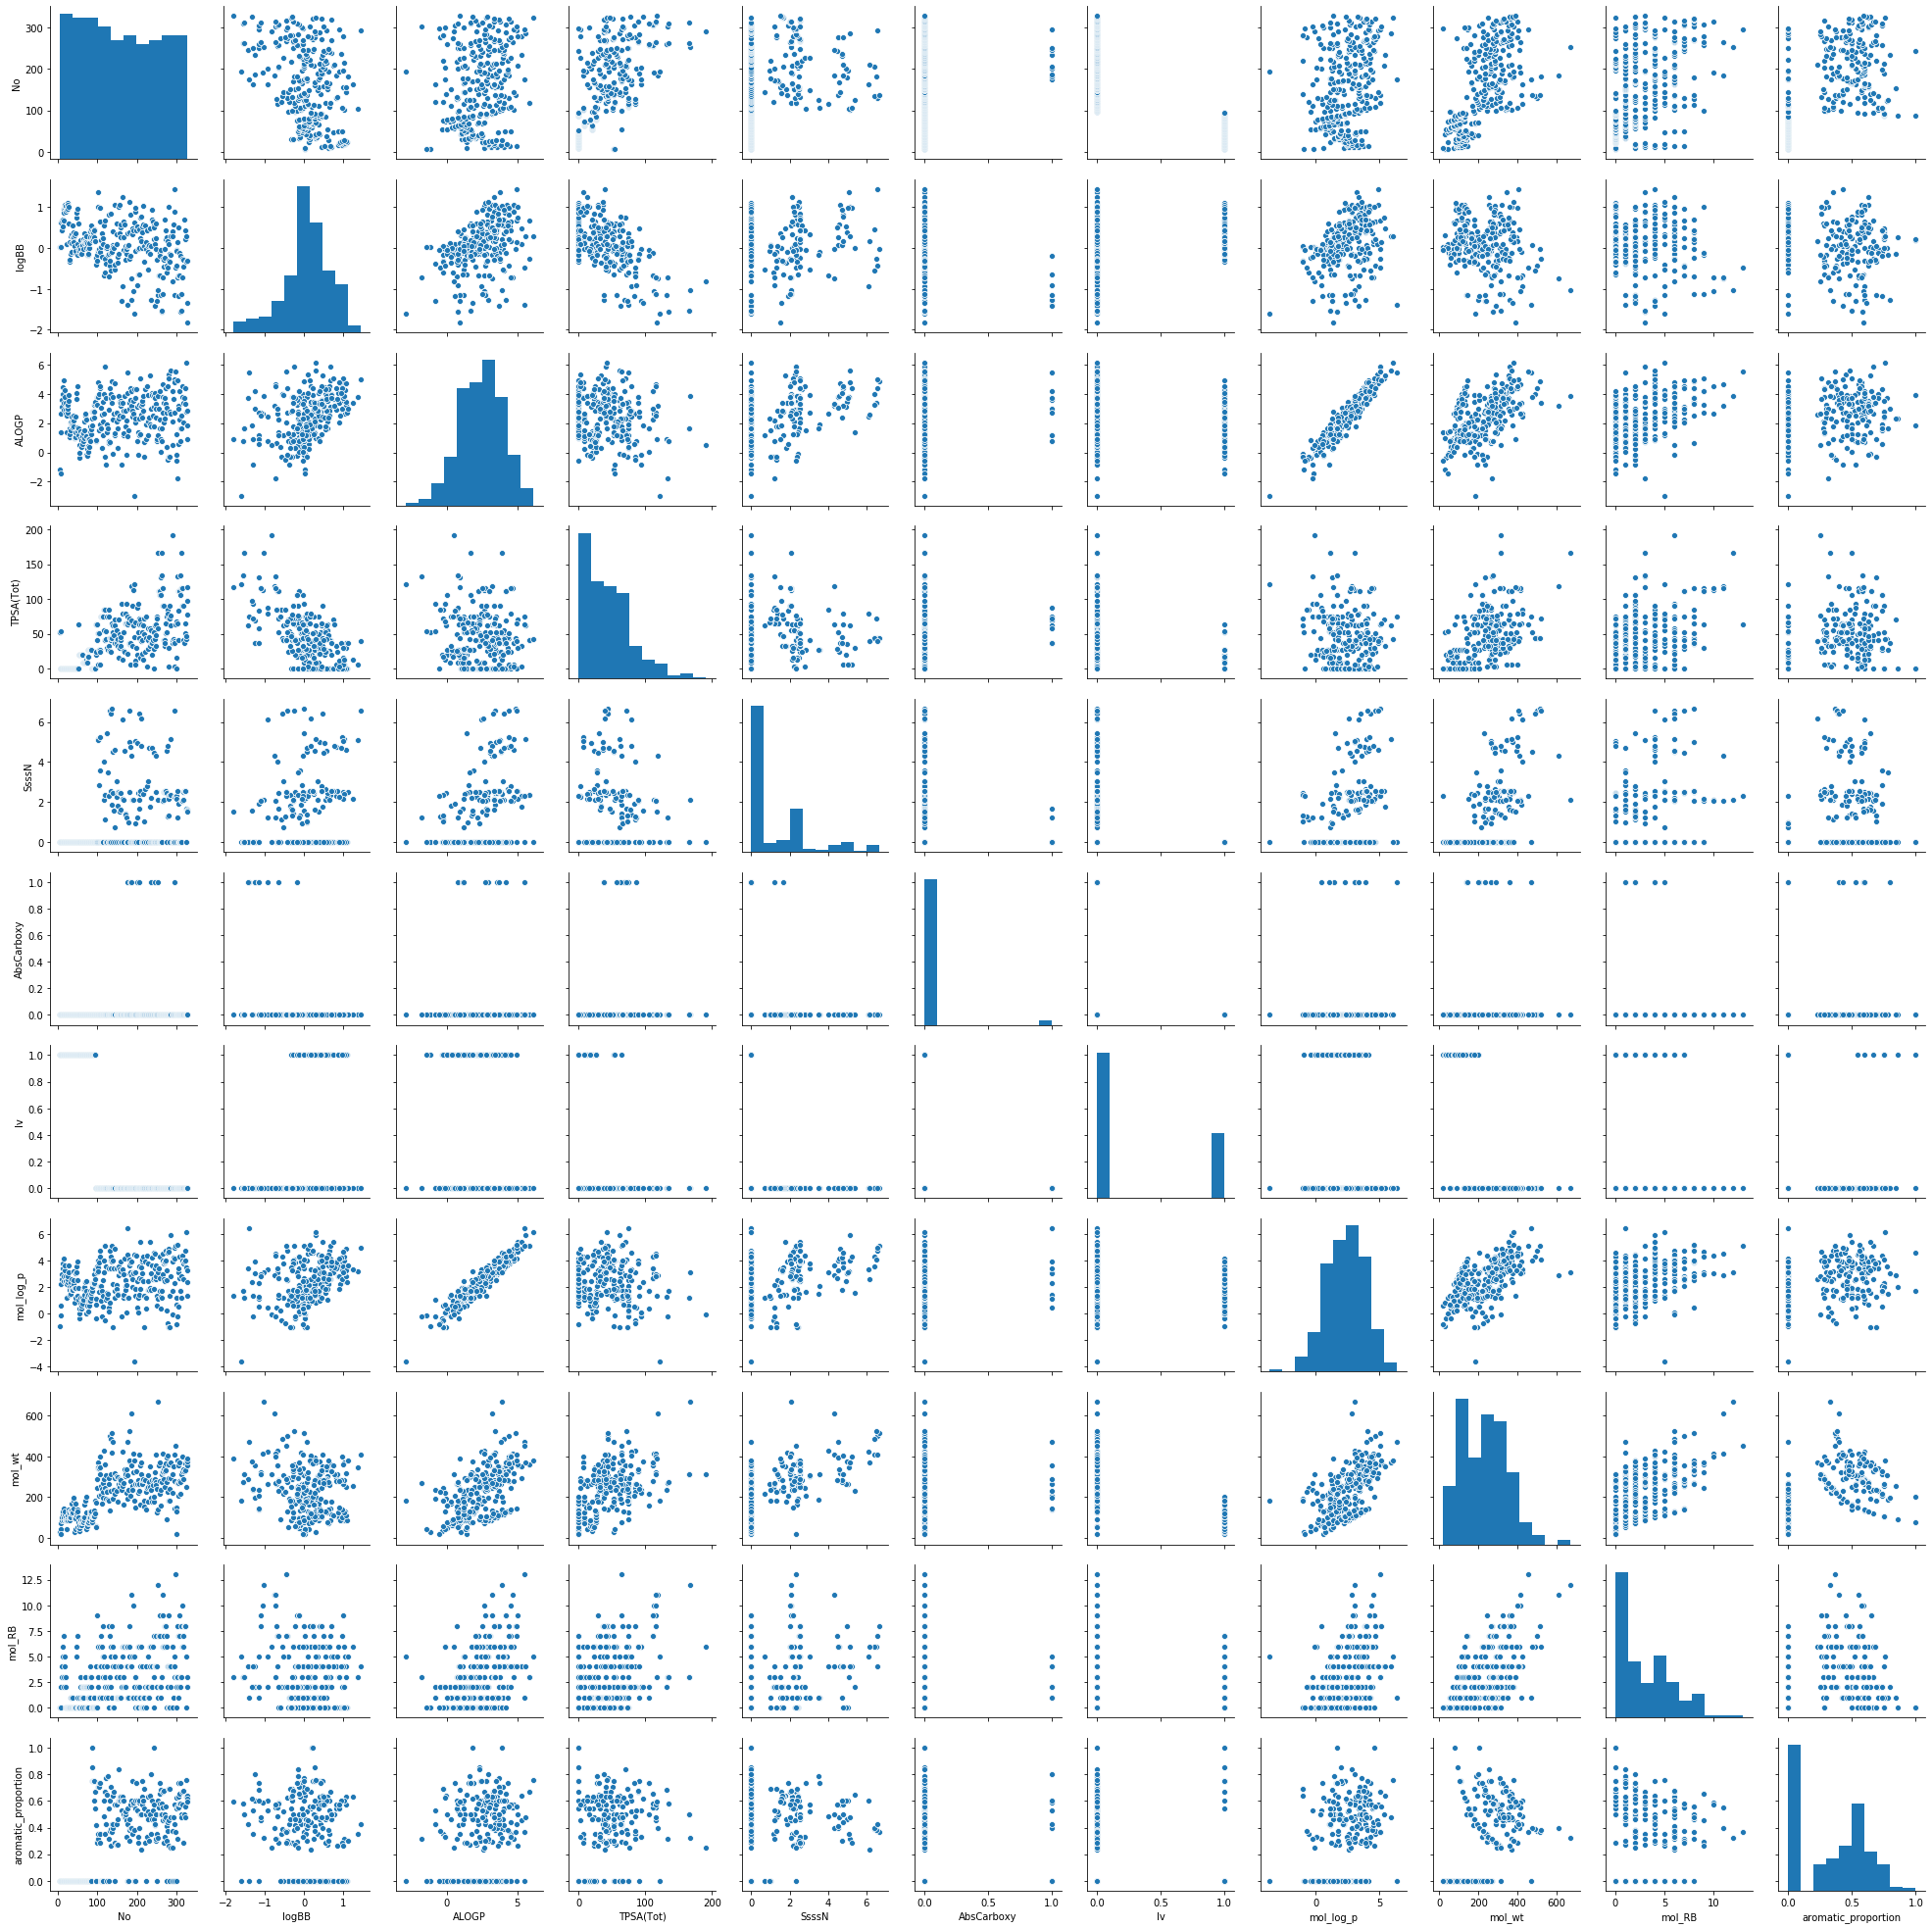

In [224]:
sns.pairplot(desc)

In [228]:
desc.head(2)

,KC291-dataset- SMILES,No,Name,logBB,ALOGP,TPSA(Tot),SsssN,AbsCarboxy,Iv,mol_log_p,mol_wt,mol_RB,aromatic_proportion
0,[N][N],6,Nitrogen,0.03,-1.191,52.04,0.0,0,1,-0.9612,28.014,0.0,0.0
1,[N-]=[N+]=O,7,Nitrous Oxide,0.03,-1.467,53.47,0.0,0,1,-0.1584,44.013,0.0,0.0


In [285]:
X = desc[['mol_log_p','mol_RB' , 'TPSA(Tot)' ,'aromatic_proportion', 'mol_wt']]
y = desc['logBB']

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [288]:
from sklearn.linear_model import LinearRegression

In [289]:
lr = LinearRegression()

In [290]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [291]:
# The coefficients
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 0.11769185 -0.00538399 -0.00781011 -0.15594594 -0.00016714]


In [292]:
predictions = lr.predict( X_test)

Text(0, 0.5, 'Predicted logBB')

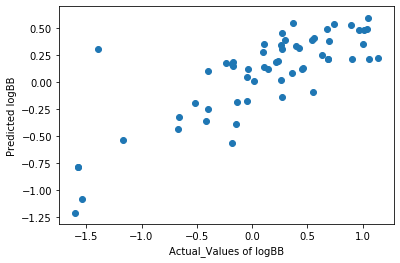

In [309]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual_Values of logBB')
plt.ylabel('Predicted logBB')

In [294]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3415939677100387
MSE: 0.19893510026647912
RMSE: 0.44602141234079684


In [296]:
from sklearn.metrics import r2_score

print('R2:', r2_score(y_test, predictions))

R2: 0.5933468999943985


In [355]:
print (f'LogBB = {round(lr.coef_[0], 4)} logP {round(lr.coef_[1], 4)} R_bonds {round(lr.coef_[2], 4)} TPSA {round(lr.coef_[3], 4)} aromatic_proportion {round(lr.coef_[4], 4)} mol_wt' )

LogBB = 0.1177 logP -0.0054 R_bonds -0.0078 TPSA -0.1559 aromatic_proportion -0.0002 mol_wt


In [356]:
## logistic regression 

In [357]:
desc.head()

,KC291-dataset- SMILES,No,Name,logBB,ALOGP,TPSA(Tot),SsssN,AbsCarboxy,Iv,mol_log_p,mol_wt,mol_RB,aromatic_proportion
0,[N][N],6,Nitrogen,0.030000,-1.191,52.04,0.0,0,1,-0.9612,28.014,0.0,0.0
1,[N-]=[N+]=O,7,Nitrous Oxide,0.030000,-1.467,53.47,0.0,0,1,-0.1584,44.013,0.0,0.0
2,[H]C([H])([H])[H],8,Methane,0.030000,1.376,0.00,0.0,0,1,0.6361,16.043,0.0,0.0
3,CCCCC,9,Pentane,0.632423,2.653,0.00,0.0,0,1,2.1965,72.151,2.0,0.0
4,CCCCCC,10,Hexane,0.680000,3.109,0.00,0.0,0,1,2.5866,86.178,3.0,0.0


In [369]:
permeability = ['']
for element in desc['logBB'].iloc[:]:
    if element >0:
        permeability.append('permeable')
    elif element ==0:
        permeability.append('permeable')
    else:
        permeability.append('non-permeable')
    

In [370]:
permeability

['',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'non-permeable',
 'permeable',
 'non-permeable',
 'non-permeable',
 'permeable',
 'non-permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'non-permeable',
 'permeable',
 'non-permeable',
 'permeable',
 'permeable',
 'permeable',
 'non-permeable',
 'permeable',
 'non-permeable',
 'permeable',
 'permeable',
 'non-permeable',
 'non-permeable',
 'non-permeable',
 'permeable',
 'non-permeable',
 'non-permeable',
 'permeable',
 'permeable',
 'permeable',
 'non-permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 'permeable',
 

In [371]:
df_permeability = pd.DataFrame(permeability, columns =['permeability'])

In [372]:
desc1 = pd.concat([desc, df_permeability], axis =1)

In [374]:
desc1.to_csv('Permeability.csv')

In [375]:
desc2 = pd.read_csv('Permeability.csv')

In [376]:
P = pd.get_dummies(desc2['permeability'], drop_first= True)

In [379]:
P.head()

,permeable
0,1
1,1
2,1
3,1
4,1


In [381]:
df_lr = pd.concat([desc2, P], axis =1)

In [385]:
df_lr

,Unnamed: 0,KC291-dataset- SMILES,No,Name,logBB,ALOGP,TPSA(Tot),SsssN,AbsCarboxy,Iv,mol_log_p,mol_wt,mol_RB,aromatic_proportion,permeability,permeable
0,0,[N][N],6.0,Nitrogen,0.030000,-1.191,52.04,0.00000,0.0,1.0,-0.9612,28.014,0.0,0.000000,permeable,1
1,1,[N-]=[N+]=O,7.0,Nitrous Oxide,0.030000,-1.467,53.47,0.00000,0.0,1.0,-0.1584,44.013,0.0,0.000000,permeable,1
2,2,[H]C([H])([H])[H],8.0,Methane,0.030000,1.376,0.00,0.00000,0.0,1.0,0.6361,16.043,0.0,0.000000,permeable,1
3,3,CCCCC,9.0,Pentane,0.632423,2.653,0.00,0.00000,0.0,1.0,2.1965,72.151,2.0,0.000000,permeable,1
4,4,CCCCCC,10.0,Hexane,0.680000,3.109,0.00,0.00000,0.0,1.0,2.5866,86.178,3.0,0.000000,permeable,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,NC(N3C1=CC=CC=C1C2CC2C4=CC=CC=C34)=O,325.0,CBZ-EPO,-0.340000,2.800,46.33,1.64963,0.0,0.0,3.4879,250.301,0.0,0.631579,permeable,1
288,288,O=C3C1=C(N2C=NC(C4=NOC(C(C)C)=N4)=C2CN3C)C=CC=...,326.0,"L-663,581",-0.300000,2.832,77.05,1.60929,0.0,0.0,3.2847,357.801,2.0,0.640000,non-permeable,0
289,289,O=C3C1=C(N2C=NC(C4=NOC(C(C)(O)C)=N4)=C2CN3C)C=...,327.0,"M1L-663,581",-1.340000,1.826,97.28,1.56121,0.0,0.0,2.3887,373.800,2.0,0.615385,non-permeable,0
290,290,O=C3C1=C(N2C=NC(C4=NOC(C(C)(O)CO)=N4)=C2CN3C)C...,328.0,"M2L-663,581",-1.820000,0.938,117.51,1.52738,0.0,0.0,1.3611,389.799,3.0,0.592593,non-permeable,0


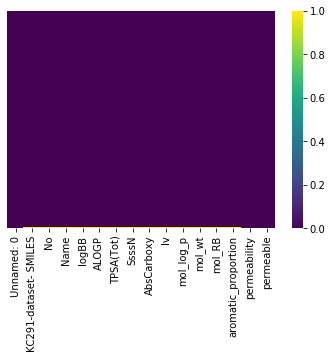

In [383]:
sns.heatmap(df_lr.isnull(), yticklabels =False, cmap ='viridis')

In [399]:
df_lr.dropna(inplace =True)

In [400]:
X = df_lr[['mol_log_p','mol_RB' , 'TPSA(Tot)' ,'aromatic_proportion', 'mol_wt']]
y = df_lr['permeable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [401]:
from sklearn.linear_model import LogisticRegression

In [402]:
logm = LogisticRegression()

In [403]:
logm.fit(X_train, y_train)

C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [404]:
predictions = logm.predict(X_test)

In [405]:
from sklearn.metrics import classification_report

In [406]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.42      0.51        24
           1       0.68      0.86      0.76        35

    accuracy                           0.68        59
   macro avg       0.67      0.64      0.64        59
weighted avg       0.68      0.68      0.66        59



In [407]:
from sklearn.metrics import confusion_matrix

In [408]:
confusion_matrix(y_test, predictions)

array([[10, 14],
       [ 5, 30]], dtype=int64)